In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [39]:
from keras.models import Sequential
from sklearn.utils import shuffle

In [52]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 10,
         'ytick.labelsize': 10}
plt.rcParams.update(params)

In [53]:
## Change to the 'Datasets directory'
gold_col = 'GOLDAMGBDollarD228NLBM' # 'GOLD_shift' 
initial_dir = os.getcwd()
data_path = os.path.join(os.getcwd(), "data")

In [72]:
parameter_list = ['Fed Debt_Total Public Debt as Perc of GDP', 'Industrial Production_Manufacturing (NAICS)',  'Unemployment_Rate', 'Households and Nonprofit Organizations_Total Assets', 'Corp_Total Assets', 'FEDFUNDS', 'Federal Debt Held by Federal Reserve Banks', 'All Employees, Retail Trade']
none_list = ['Total Vehicle Sales', 'New Private Housing Units Authorized by Building Permits', 'IndustrialProductionGoldSilver21222S', ]
parameter_list

['Fed Debt_Total Public Debt as Perc of GDP',
 'Industrial Production_Manufacturing (NAICS)',
 'Unemployment_Rate',
 'Households and Nonprofit Organizations_Total Assets',
 'Corp_Total Assets',
 'FEDFUNDS',
 'Federal Debt Held by Federal Reserve Banks',
 'All Employees, Retail Trade']

In [73]:
hml_list = ['high', 'mid', 'low']

In [74]:
model_path = os.path.join(os.getcwd(), "model")
# Import the exported model in future runs using the greyed out line below (remove the hastag)
classifier = pickle.load(open(os.path.join(model_path, "ReinNN.pkl"), "rb"))

In [75]:
gold_col = 'GOLDAMGBDollarD228NLBM'
leading_list = [gold_col, 'Industrial Production_Manufacturing (NAICS)', 'All Employees, Retail Trade', 'Unemployment_Rate', 'IndustrialProductionGoldSilver21222S', 'Federal Debt Held by Federal Reserve Banks', 'FEDFUNDS', 'Fed Debt_Total Public Debt as Perc of GDP', 'Households and Nonprofit Organizations_Total Assets', 'Total Vehicle Sales', 'New Private Housing Units Authorized by Building Permits', 'Corp_Total Assets']
# 
min_date = '1969-01-01'

In [76]:
gold_df_fit = pd.read_csv(os.path.join(os.getcwd(), "data_export", 'gold_df.csv'), index_col=0).filter(leading_list, axis=1)

In [77]:
gold_df_fit = gold_df_fit.loc[(gold_df_fit.index > min_date) & (gold_df_fit.index < '2024-01-01')]

idx = pd.date_range(start=dt.date(2020, 8, 31), end=dt.date(2024, 8, 31), freq='M')

gold_df_fit1 = gold_df_fit.copy().reindex(idx)

gold_df_fit = gold_df_fit.append(gold_df_fit1).reset_index()

gold_df_fit['index'] = pd.to_datetime(gold_df_fit['index'])
gold_df_fit.index = gold_df_fit['index']
gold_df_fit.drop(['index'], axis=1, inplace=True)

In [78]:
# Create High, mid, low cases.
gold_df_low = gold_df_fit.copy()
gold_df_mid = gold_df_fit.copy()
gold_df_high = gold_df_fit.copy()

In [79]:
for i in gold_df_fit.columns:
    frac_null = gold_df_mid[i].isna().sum() /len(gold_df_mid)
    print(i, ':', frac_null)

GOLDAMGBDollarD228NLBM : 0.07324364723467862
Industrial Production_Manufacturing (NAICS) : 0.13004484304932734
All Employees, Retail Trade : 0.07473841554559044
Unemployment_Rate : 0.07623318385650224
IndustrialProductionGoldSilver21222S : 0.13004484304932734
Federal Debt Held by Federal Reserve Banks : 0.10164424514200299
FEDFUNDS : 0.07473841554559044
Fed Debt_Total Public Debt as Perc of GDP : 0.08370702541106129
Households and Nonprofit Organizations_Total Assets : 0.08370702541106129
Total Vehicle Sales : 0.20029895366218237
New Private Housing Units Authorized by Building Permits : 0.07623318385650224
Corp_Total Assets : 0.08370702541106129


In [80]:
# Fit the end point value for the high df
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('Federal Debt Held by Federal Reserve Banks')] = 7500
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('FEDFUNDS')] = -2
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('Industrial Production_Manufacturing (NAICS)')] = 98
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('All Employees, Retail Trade')] = 15000
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('Unemployment_Rate')] = 10
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('IndustrialProductionGoldSilver21222S')] = 80
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = 180
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('Households and Nonprofit Organizations_Total Assets')] = 130000
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('Total Vehicle Sales')] = 1400
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('New Private Housing Units Authorized by Building Permits')] = 1300
gold_df_high.iloc[-1, gold_df_fit.columns.get_loc('Corp_Total Assets')] = 46000

In [81]:
# Fit the end point value for the mid df
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('Federal Debt Held by Federal Reserve Banks')] = 4800
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('FEDFUNDS')] = 0
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('Industrial Production_Manufacturing (NAICS)')] = 105
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('All Employees, Retail Trade')] = 16000
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('Unemployment_Rate')] = 7.8
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('IndustrialProductionGoldSilver21222S')] = 108
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = 145
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('Households and Nonprofit Organizations_Total Assets')] = 140000
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('Total Vehicle Sales')] = 1650
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('New Private Housing Units Authorized by Building Permits')] = 1700
gold_df_mid.iloc[-1, gold_df_fit.columns.get_loc('Corp_Total Assets')] = 49000

In [82]:
# Fit the end point value for the low df
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('Federal Debt Held by Federal Reserve Banks')] = 4000
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('FEDFUNDS')] = 1
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('Industrial Production_Manufacturing (NAICS)')] = 115
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('All Employees, Retail Trade')] = 17000
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('Unemployment_Rate')] = 6.0
gold_df_low.iloc[-1, gold_df_low.columns.get_loc('IndustrialProductionGoldSilver21222S')] = 125
gold_df_low.iloc[-1, gold_df_fit.columns.get_loc('Fed Debt_Total Public Debt as Perc of GDP')] = 110
gold_df_low.iloc[-1, gold_df_fit.columns.get_loc('Households and Nonprofit Organizations_Total Assets')] = 160000
gold_df_low.iloc[-1, gold_df_fit.columns.get_loc('Total Vehicle Sales')] = 2000
gold_df_low.iloc[-1, gold_df_fit.columns.get_loc('New Private Housing Units Authorized by Building Permits')] = 1800
gold_df_low.iloc[-1, gold_df_fit.columns.get_loc('Corp_Total Assets')] = 52000

In [83]:
interpolation_list = ['Industrial Production_Manufacturing (NAICS)', 'All Employees, Retail Trade', 'Unemployment_Rate', 'IndustrialProductionGoldSilver21222S', 'Federal Debt Held by Federal Reserve Banks', 'FEDFUNDS', 'Fed Debt_Total Public Debt as Perc of GDP', 'Households and Nonprofit Organizations_Total Assets', 'Total Vehicle Sales','New Private Housing Units Authorized by Building Permits', 'Corp_Total Assets']
hml_list = [gold_df_low, gold_df_mid, gold_df_high]
# Interpolate for the null values
for j in hml_list:
    for i in interpolation_list:
        j[i] = j[i].interpolate(method='linear', limit_direction='both')

In [84]:
for i in gold_df_mid.columns:
    frac_null = gold_df_mid[i].isna().sum() /len(gold_df_mid)
    print(i, ':', frac_null)

GOLDAMGBDollarD228NLBM : 0.07324364723467862
Industrial Production_Manufacturing (NAICS) : 0.0
All Employees, Retail Trade : 0.0
Unemployment_Rate : 0.0
IndustrialProductionGoldSilver21222S : 0.0
Federal Debt Held by Federal Reserve Banks : 0.0
FEDFUNDS : 0.0
Fed Debt_Total Public Debt as Perc of GDP : 0.0
Households and Nonprofit Organizations_Total Assets : 0.0
Total Vehicle Sales : 0.0
New Private Housing Units Authorized by Building Permits : 0.0
Corp_Total Assets : 0.0


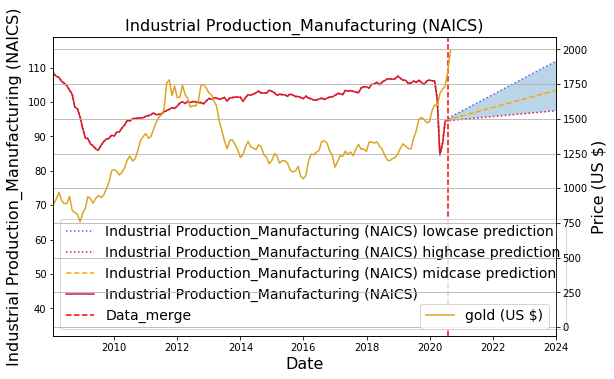

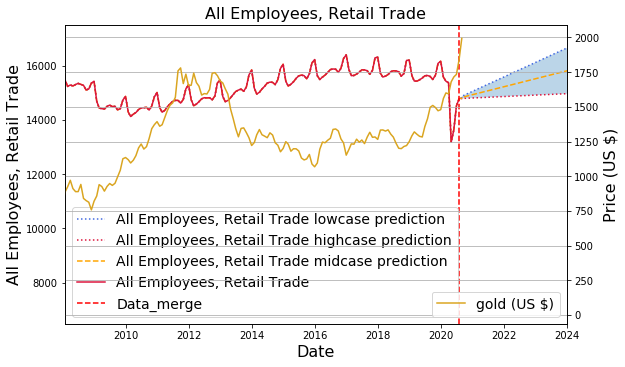

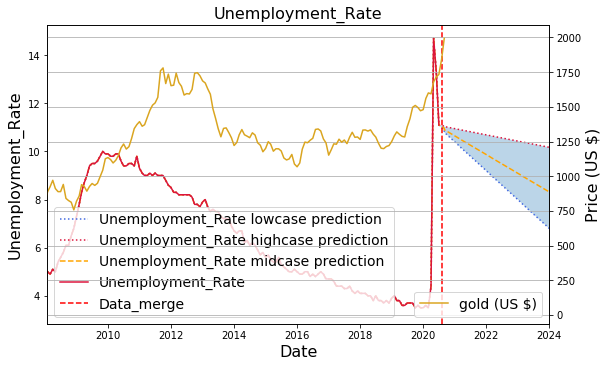

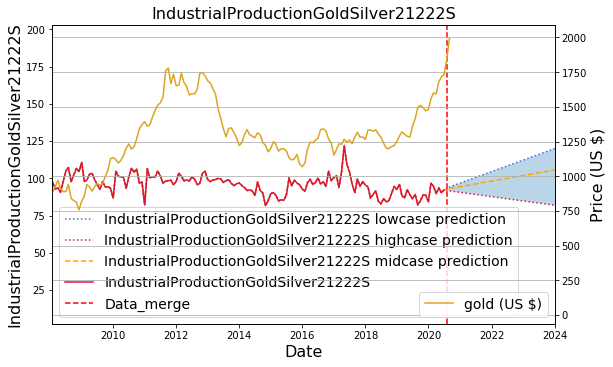

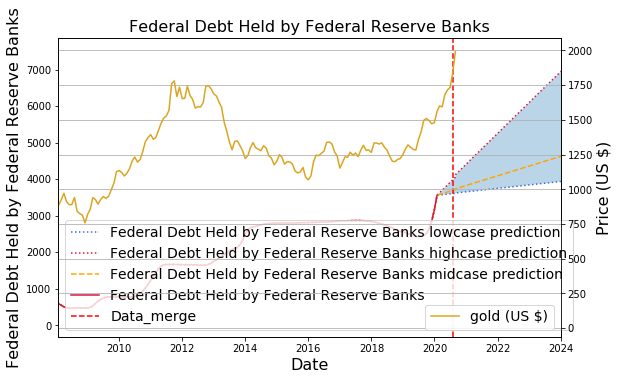

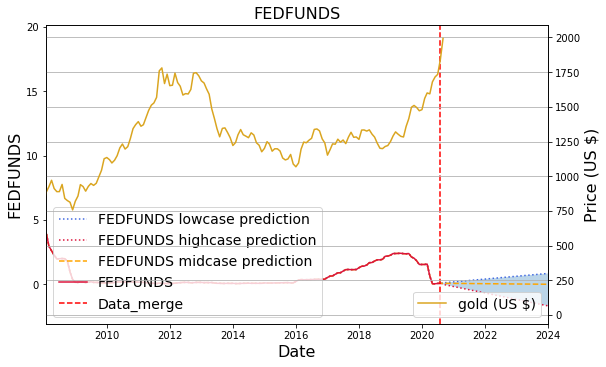

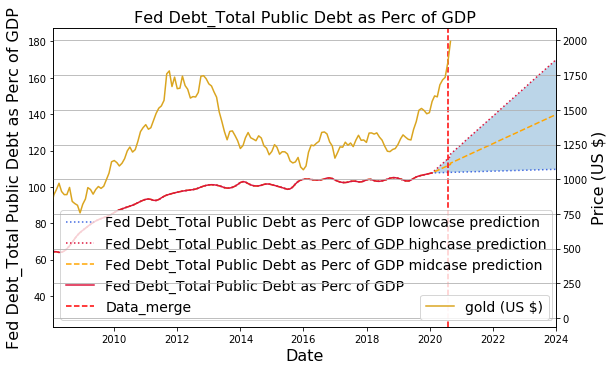

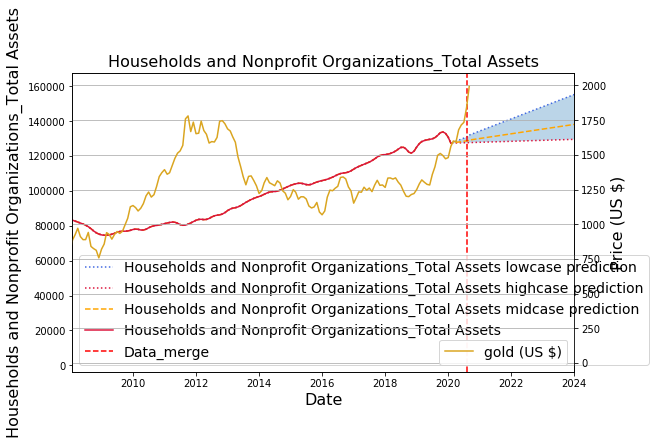

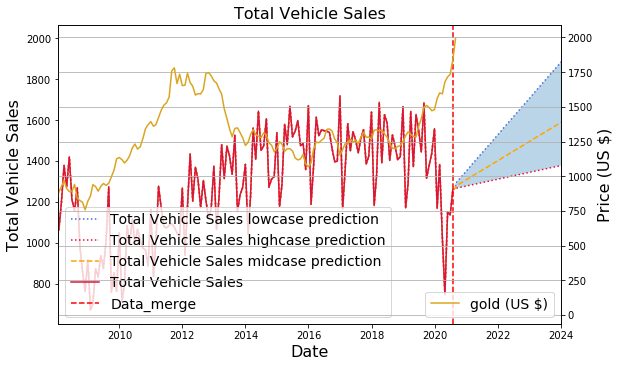

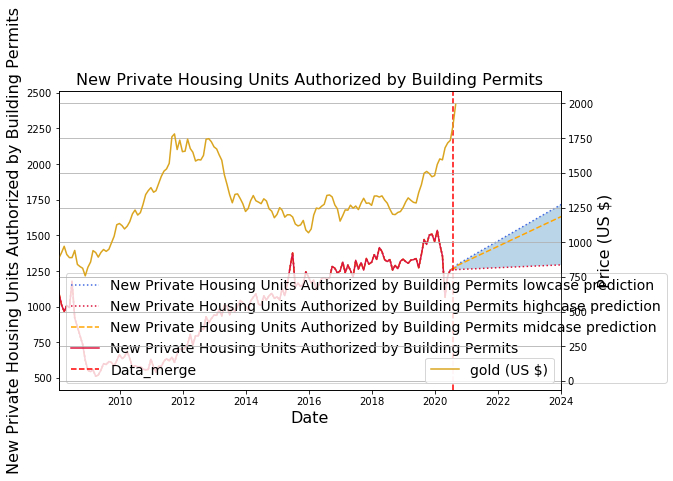

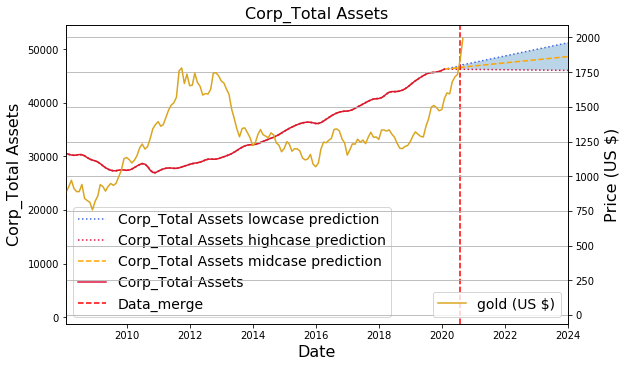

In [85]:
# Plot each of the 'extrapolate_list' attributes. The estimates look good and represent a 'best' case.
for i in interpolation_list:
    # Visualising the Linear Regression results.
    fig, ax1 = plt.subplots()
    j = i
    #k = 'Industrial Production_Manufacturing (NAICS)1'

    ax1.plot(gold_df_mid.index, gold_df_low[j], label=i + ' lowcase prediction', c='royalblue', linestyle='dotted')
    ax1.plot(gold_df_mid.index, gold_df_high[j], label=i + ' highcase prediction', c='crimson', linestyle='dotted')
    ax1.plot(gold_df_mid.index, gold_df_mid[j], label=i + ' midcase prediction', c='orange', linestyle='dashed')
    ax1.plot(gold_df_fit.index, gold_df_fit[j], label=i, c='crimson', linestyle='solid')
    ax1.axvline(x=dt.date(2020, 8, 1), linestyle='--', color='red', label='Data_merge')
    #ax1.plot(gold_df_fit.index, gold_df_fit[j], label=j, c='mediumturquoise')
    
    ax1.fill_between(gold_df_high.index, gold_df_low[j],  gold_df_high[j], alpha=0.3)


    ax2 = ax1.twinx()
    ax2.plot(gold_df_fit.index, gold_df_fit['GOLDAMGBDollarD228NLBM'], label='gold (US $)', c='goldenrod')
    #ax2.plot(gold_df.index, gold_df['GOLD_shift'], label='gold shifted (US $)', c='gold')

    #ax1.ylim(0, 15)
    plt.title(j)
    plt.xlabel('Date')
    plt.grid()
    ax1.legend(loc=3)
    ax2.legend(loc=4)
    fig.set_size_inches(9, 5.5)

    #years = mdates.YearLocator()   # every year
    #ax1.xaxis.set_major_locator(years)
    #years_fmt = mdates.DateFormatter('%Y')
    #months = mdates.MonthLocator()  # every month
    #ax1.xaxis.set_major_formatter(years_fmt)
    #ax1.xaxis.set_minor_locator(months)

    ax1.set_xlim([dt.date(2008, 1, 26), dt.date(2024, 1, 1)])
    ax1.set_xlabel('Date')
    ax1.set_ylabel(j)
    ax2.set_ylabel('Price (US $)')

In [104]:
# Export the polished dataframe to re-import after modelling.
gold_df_low.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_low.csv"))
gold_df_mid.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_mid.csv"))
gold_df_high.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_high.csv"))

In [126]:
lmh_list = ['low', 'mid', 'high']
# df_y is target to predict, in this case the price of gold
df_y = gold_df_low[[gold_col]].copy()
# df_train contains the columns we will use to predict the price of gold
df_train = gold_df_low.copy()

# Instead of randomly splitting the data we will select a date to test 'blind' from
date_slice = '2016-07-31'

# Data split according to the date. 'train'=before date, 'test'=after.
y_train = df_y.loc[df_y.index < date_slice]
X_train = df_train.loc[df_train.index < date_slice]
X_test_low = df_train.loc[df_train.index >= date_slice]
X_test_mid = gold_df_mid.loc[gold_df_mid.index >= date_slice]
X_test_high = gold_df_high.loc[gold_df_high.index >= date_slice]

In [130]:
X_train = X_train.filter(parameter_list, axis=1)
X_test_low = X_test_high.filter(parameter_list, axis=1)
X_test_mid = X_test_high.filter(parameter_list, axis=1)
X_test_high = X_test_high.filter(parameter_list, axis=1)

In [128]:
## Initialise Scalars so that data is normalised to 1.
sc_x = StandardScaler()
sc_y = StandardScaler()
## Normalise the data using the scalar.
train_X = sc_x.fit_transform(X_train)
X_low = sc_x.transform(X_test_low)
X_mid = sc_x.transform(X_test_mid)
X_high = sc_x.transform(X_test_high)

train_y = sc_y.fit_transform(y_train)

# Calculate the predicted deaths according to the neural net model
X_test_low["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_low))
# Calculate the predicted deaths according to the neural net model
train_X["gold_pred"] = sc_y.inverse_transform(classifier.predict(train_X))
df = df.append(df1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [37]:
for i in hml_list:

    ## Initialise Scalars so that data is normalised to 1.
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    ## Normalise the data using the scalar.
    X_train = sc_x.fit_transform(train_X)
    X_test = sc_x.transform(test_x)

    y_train = sc_y.fit_transform(train_y)
    y_test = sc_y.transform(test_y)

    # Calculate the predicted deaths according to the neural net model
    test_x["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_test))
    # Calculate the predicted deaths according to the neural net model
    train_X["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_train))
    #df1 = pd.concat([test_x, train_X], axis=1)
    df= train_X.merge(train_y,left_index=True, right_index=True)
    # We merge the test dataframes together
    df1 = test_x.merge(test_y, left_index=True, right_index=True)
    # We append the test data to the train data
    df = df.append(df1)
    
    # Again read in the 'covid19_df' as df_global
    df_global = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df_" + i + ".csv"), index_col=0)
    # Merge in the 'deaths_pred' prediction column to compare to the real data
    df_global = df_global.merge(df["gold_pred"], left_index=True, right_index=True, how='left')
    df_global.index = pd.to_datetime(df_global.index)
    
    df_global.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_" + i + ".csv"))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [18]:
# Compute the prediction error
df_global_high['gold_pred_error'] = df_global_high['GOLDAMGBDollarD228NLBM'] - df_global_high['gold_pred']
# Compute the cumulative error for gold
df_global_high['cumulative_error'] = df_global_high['gold_pred_error'].cumsum()

gold_df_mid['gold_pred_error'] = df_global_mid['GOLDAMGBDollarD228NLBM'] - df_global_mid['gold_pred']
df_global_mid['cumulative_error'] = df_global_mid['gold_pred_error'].cumsum()
df_global_low['gold_pred_error'] = df_global_low['GOLDAMGBDollarD228NLBM'] - df_global_low['gold_pred']
df_global_low['cumulative_error'] = df_global_low['gold_pred_error'].cumsum()

Text(0, 0.5, 'Price (US $)')

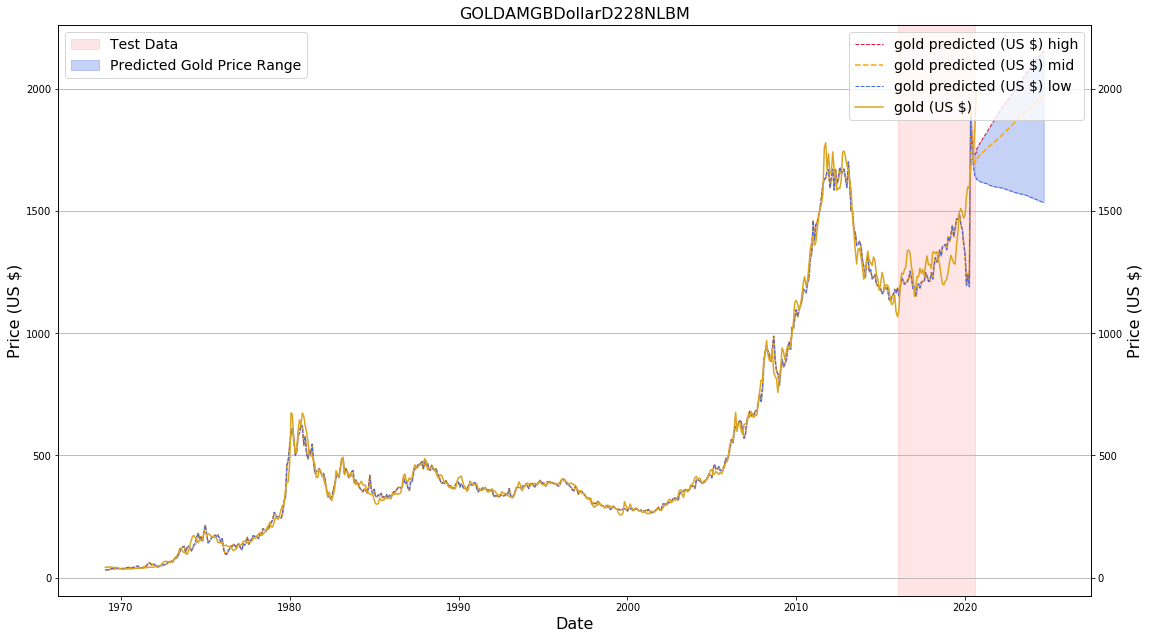

In [19]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'GOLDAMGBDollarD228NLBM'
k = 'gold_pred_error'
l = 'gold_pred'

#ax1.plot(df_global.index, df_global[k], label=k, c='mediumturquoise')
#ax1.axvline(x=dt.date(2020, 8, 1), linestyle='--', color='black', label='Real_Data_Cutoff', linewidth=1)
#ax1.axvline(x=dt.date(2016, 1, 1), linestyle=':', color='black', label='Test_Data_Cutoff', linewidth=1)

ax2 = ax1.twinx()
ax1.fill_between(df_global_high.index, df_global_low[l],  df_global_high[l], color='royalblue', alpha=0.3, label='Predicted Gold Price Range')
ax1.axvspan(dt.date(2016, 1, 1), dt.date(2020, 8, 1), alpha=0.1, color='red', label='Test Data')
ax2.plot(df_global_high.index, df_global_high[l], label='gold predicted (US $) high', c='crimson', linestyle='dashed', linewidth=1)
ax2.plot(df_global_mid.index, df_global_mid[l], label='gold predicted (US $) mid', c='orange', linestyle='dashed')
ax2.plot(df_global_low.index, df_global_low[l], label='gold predicted (US $) low', c='royalblue', linestyle='dashed', linewidth=1)
ax2.plot(df_global_high.index, df_global_high[j], label='gold (US $)', c='goldenrod')


#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (US $)')
ax2.set_ylabel('Price (US $)')
#plt.savefig('cumulative_error_20_countries_XGB_dpi300.jpeg', dpi=300)

In [292]:
## Calculate the mean absolute error and R2 scores for the predicted vs real test data.
print(f"Test data MAE score: {np.round(mean_absolute_error(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")
print(f"Test data R2 score: {np.round(r2_score(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")

Test data MAE score: 91.0
Test data R2 score: 0.0


In [279]:
## Check for the directory and output the df_global dataframe.
if os.path.exists(os.path.join(os.getcwd(), "model_predictions")) is False:
    os.mkdir(os.path.join(os.getcwd(), "model_predictions"))
df_global_high.to_csv(os.path.join(os.getcwd(), "model_predictions", "Rein_nn_predictions_high.csv"))
df_global_mid.to_csv(os.path.join(os.getcwd(), "model_predictions", "Rein_nn_predictions_mid.csv"))
df_global_low.to_csv(os.path.join(os.getcwd(), "model_predictions", "Rein_nn_predictions_low.csv"))

In [280]:
plt.style.use("ggplot")

In [182]:
plt.rcdefaults()